In [79]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import numpy as np


In [48]:
from google.colab import files
upload=files.upload()
data = pd.read_csv('heart.csv', sep=",")

Saving heart.csv to heart (13).csv


In [19]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
missing_values = data.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


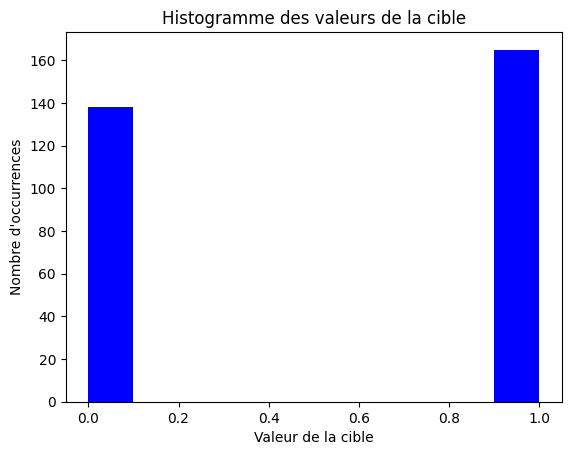

In [28]:
target_values = [0, 1]
value_counts = data["output"].value_counts()
bins = [value - 0.5 for value in target_values] + [target_values[-1] + 0.5]
plt.hist(data["output"], align="mid", color="blue")
plt.xlabel("Valeur de la cible")
plt.ylabel("Nombre d'occurrences")
plt.title("Histogramme des valeurs de la cible")
plt.show()

<Axes: >

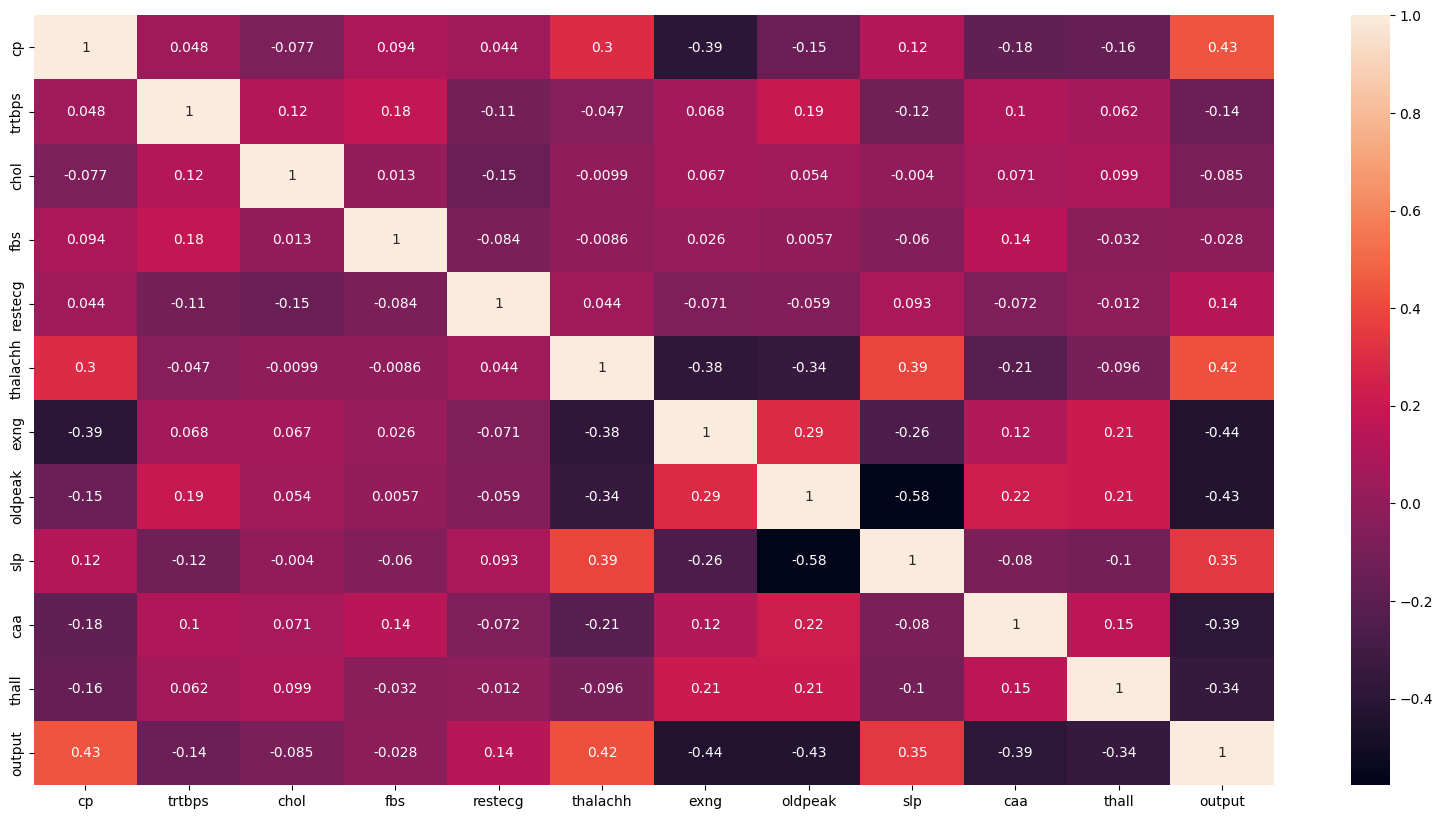

In [44]:

plt.figure(figsize=(20, 10))
sns.heatmap(data_corr.corr(),annot=True)

In [47]:
# Generate a random classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier with a polynomial kernel and a C value of 10
clf = svm.SVC(kernel='poly', C=10)
clf.fit(X_train, y_train)

# Evaluate the performance of the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [60]:
# Create an instance of SVM classifier
svm_classifier = SVC()

# Define a grid of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf']}

# Create a grid search object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Training Score: ", grid_search.best_score_)
print("Test Score: ", grid_search.score(X_test, y_test))

Best Hyperparameters:  {'C': 10, 'kernel': 'rbf'}
Training Score:  0.925
Test Score:  0.945


<ipython-input-62-2b327ab8cbf0>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot(index='param_C', columns='param_kernel', values='mean_test_score')


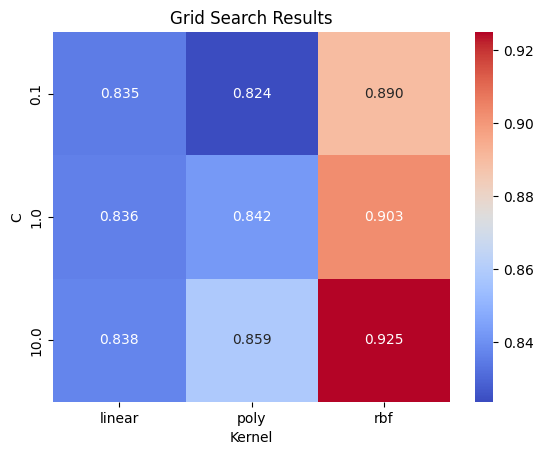

In [62]:
results = pd.DataFrame(grid_search.cv_results_)
heatmap_data = results.pivot(index='param_C', columns='param_kernel', values='mean_test_score')
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Grid Search Results')
plt.xlabel('Kernel')
plt.ylabel('C')
plt.show()

In [86]:
# Create an instance of SVM classifier
svm_classifier = SVC()

# Define a distribution of hyperparameters to search over
param_dist = {'C': randint(1, 10),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Create a randomized search object
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_dist, cv=5)

# Fit the randomized search object to the training data
random_search.fit(X_train, y_train)

print("Best Hyperparameters: ", random_search.best_params_)
print("Training Score: ", random_search.best_score_)
print("Test Score: ", random_search.score(X_test, y_test))

Best Hyperparameters:  {'C': 1, 'kernel': 'rbf'}
Training Score:  0.9025000000000001
Test Score:  0.92


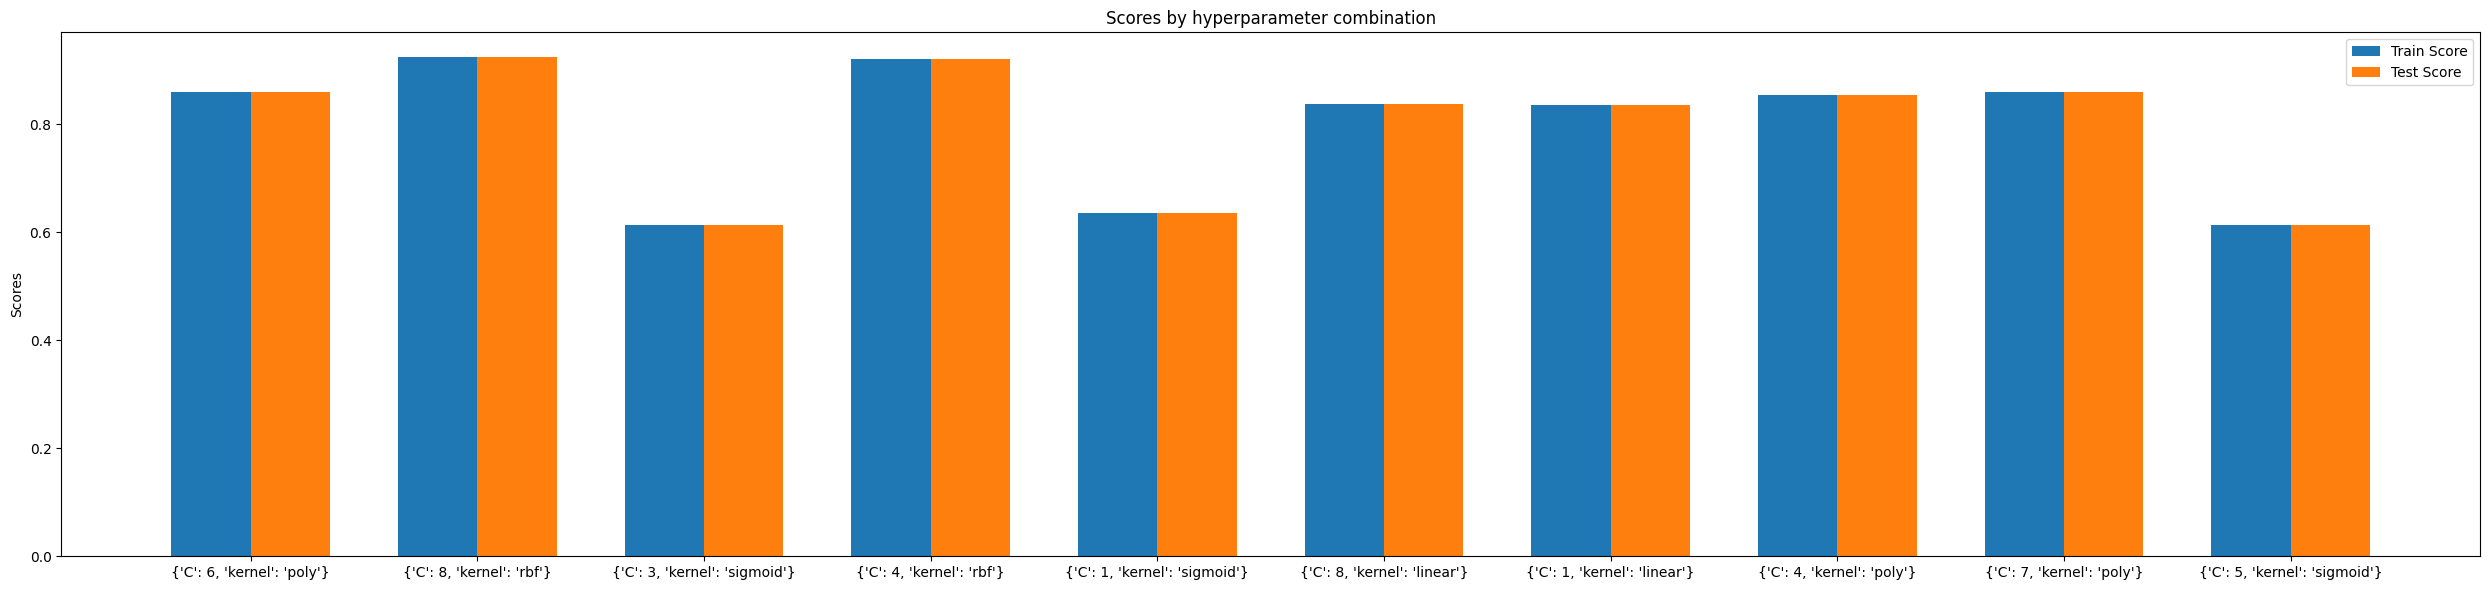

In [84]:
# Store the results in arrays
params = []
train_scores = []
test_scores = []
for i, hyperparams in enumerate(random_search.cv_results_['params']):
    params.append(str(hyperparams))
    train_scores.append(random_search.cv_results_['mean_test_score'][i])
    test_scores.append(random_search.cv_results_['mean_test_score'][i])

# Set up the bar chart
x = np.arange(len(params))
width = 0.35

fig, ax = plt.subplots(figsize=(25, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Train Score')
rects2 = ax.bar(x + width/2, test_scores, width, label='Test Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by hyperparameter combination')
ax.set_xticks(x)
ax.set_xticklabels(params)
ax.legend()

fig.tight_layout()

plt.show()

In [90]:
def train_models(models_with_parameters, X_train, y_train, X_test, y_test):
    best_model = None
    best_score = -1
    
    for model, parameters in models_with_parameters.items():
        grid = GridSearchCV(model, parameters, cv=5)
        grid.fit(X_train, y_train)
        score = grid.score(X_test, y_test)
        print(f"{type(model).__name__}: Best Hyperparameters: {grid.best_params_}, Test Score: {score}")
        if score > best_score:
            best_model = grid.best_estimator_
            best_score = score
    
    print(f"Best Model: {type(best_model).__name__}, Test Score: {best_score}")
    return best_model, best_model.get_params()